In [1]:
import pandas as pd
db=pd.read_csv('data.csv', sep=';')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2]:
db.head(5)
db.shape

(1460, 81)

In [3]:
db['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [4]:
db['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [5]:
db['Fence'].value_counts(dropna=False, normalize=True)

NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

In [6]:
db['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

выше указанные столбцы с пропущенными значениями можно удалить, тк процент пропущенных значений в них больше 80

In [7]:
db=db.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [8]:
db['GarageCars'].value_counts(dropna=False)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [9]:
import numpy as np
res=[]
for i in db.columns:
    res1=[]
    for j in db[i].value_counts(dropna=False).keys():
        if isinstance(j, str)==True:
            res1.append(0)
        else:
            if np.isnan(j)==True:
                res1.append(1)
            else:
                res1.append(0)
    if sum(res1)>0:
        res.append(i)
    else:
        res.append(0)
print (res)

[0, 0, 0, 'LotFrontage', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'MasVnrType', 'MasVnrArea', 0, 0, 0, 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 0, 'BsmtFinType2', 0, 0, 0, 0, 0, 0, 'Electrical', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 0, 0, 'GarageQual', 'GarageCond', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
res=[x for x in res if x!=0]
res

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

в переменных с названиями с 'Garage' всего 81 строка с пропущенными значениями, можно удалить. Но в переменных с Garage, где есть данные, стоят нули. Или гаража нет, или нет данных про гараж. 100 процентно не ясно. Поэтому удалим, но при большем количесве времени и большем количестве нан значения, лучше рассмотреть ситуацию подробнее

In [11]:
db=db.drop(np.where(np.isnan(db['GarageYrBlt'])==True)[0])

удалилась почему-то только  21 строка, после обработки всех нан значений, просто дропнем оставшиеся

In [12]:
db[res[0]]=db[res[0]].fillna(db[res[0]].mean())

вторая переменная - если вообще нет камина- это отдельная категория

In [13]:
db['FireplaceQu']=db['FireplaceQu'].fillna('w/o fireplace')

In [14]:
db['BsmtQual'].value_counts(dropna=False)

Gd     601
TA     595
Ex     121
Fa      32
NaN     30
Name: BsmtQual, dtype: int64

'MasVnrType' + Area + все BSMT просто удалим нан значения. Их немного Mas-8 BSMT-30

некоторые категориальные переменные порядковые, в таких случаях я предпочитаю заменять цифрами в соответсвии с порядками (плохо-1, хорошо-2) и исследовать их как количетсвенные.
Возможно я не права
Но тк категориальных переменных много, а времени мало, исп WOE как самый информативный метод (в моем понимании)

In [15]:
db.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,1


In [16]:
res1=[]
for i in db.columns:
    str_is=db[i].value_counts(dropna=False).keys()[0]
    if isinstance(str_is, str)==True:
        res1.append(i)
    else:
        res1.append(0)

In [17]:
res1=[x for x in res1 if x!=0]
res1

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [18]:
def get_woe_v1(db, col, target_col):
    all_good = len(db[db[target_col] == 1][col])
    all_bad = len(db[db[target_col] == 0][col])
    odds_series = (
        db[db[target_col] == 1][col].value_counts()
        /
        db[db[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    db[col + '_woe'] = db[col].apply(category_woe_dict.get)
    return db

In [19]:
res1.append('MSSubClass')
for i in res1:
    get_woe_v1(db, i, 'SaleCategory')

In [20]:
db.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_woe,FireplaceQu_woe,GarageType_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,PavedDrive_woe,SaleType_woe,SaleCondition_woe,MSSubClass_woe
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0.063781,-1.110044,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,0.056517
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0.063781,0.887988,-1.980155,-1.462501,0.032916,0.04735,0.077899,-0.168447,-0.957611,-0.340638
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338


In [21]:
db1=db.drop(res1, axis=1)

In [22]:
db1.head(5)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_woe,FireplaceQu_woe,GarageType_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,PavedDrive_woe,SaleType_woe,SaleCondition_woe,MSSubClass_woe
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.063781,-1.110044,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,0.056517
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.063781,0.887988,-1.980155,-1.462501,0.032916,0.04735,0.077899,-0.168447,-0.957611,-0.340638
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.04735,0.077899,-0.168447,-0.134170,1.223338


In [23]:
db1.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional_woe,FireplaceQu_woe,GarageType_woe,GarageFinish_woe,GarageQual_woe,GarageCond_woe,PavedDrive_woe,SaleType_woe,SaleCondition_woe,MSSubClass_woe
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1371.000000,1379.000000,1379.000000,...,1374.000000,1361.000000,1364.000000,1379.000000,1376.000000,1370.000000,1379.000000,1376.000000,1378.000000,1293.000000
mean,731.879623,70.683230,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.997082,455.578680,48.102248,...,-0.036669,-0.133348,-0.238583,-0.238241,-0.016880,-0.027391,-0.054610,-0.038538,-0.031172,-0.103276
std,421.059059,21.931281,10214.702133,1.345780,1.081031,29.379883,20.444852,184.545459,459.691379,164.324665,...,0.463011,0.971371,1.134548,1.099553,0.313355,0.442156,0.520352,0.609258,0.587049,1.083338
min,1.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,-2.652482,-1.110044,-1.980155,-1.462501,-1.616390,-2.744856,-2.514332,-1.495762,-0.957611,-2.602885
25%,366.500000,60.000000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,0.063781,-1.110044,-1.980155,-1.462501,0.032916,0.047350,0.077899,-0.168447,-0.134170,-0.340638
50%,734.000000,70.683230,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,...,0.063781,0.416206,0.385609,0.485524,0.032916,0.047350,0.077899,-0.168447,-0.134170,0.056517
75%,1094.500000,79.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,171.500000,732.000000,0.000000,...,0.063781,0.887988,0.385609,0.998259,0.032916,0.047350,0.077899,-0.168447,-0.134170,0.385609
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,0.063781,2.727415,1.390569,0.998259,0.781505,0.047350,0.077899,1.750905,1.703494,1.223338


In [24]:
corr_matrix = db1.corr()

In [25]:
good_corr=corr_matrix['SaleCategory'][corr_matrix['SaleCategory']>0.5]

In [26]:
good_corr.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'SaleCategory',
       'Neighborhood_woe', 'ExterQual_woe', 'BsmtQual_woe', 'KitchenQual_woe'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2C9813278>,
      dtype=object)

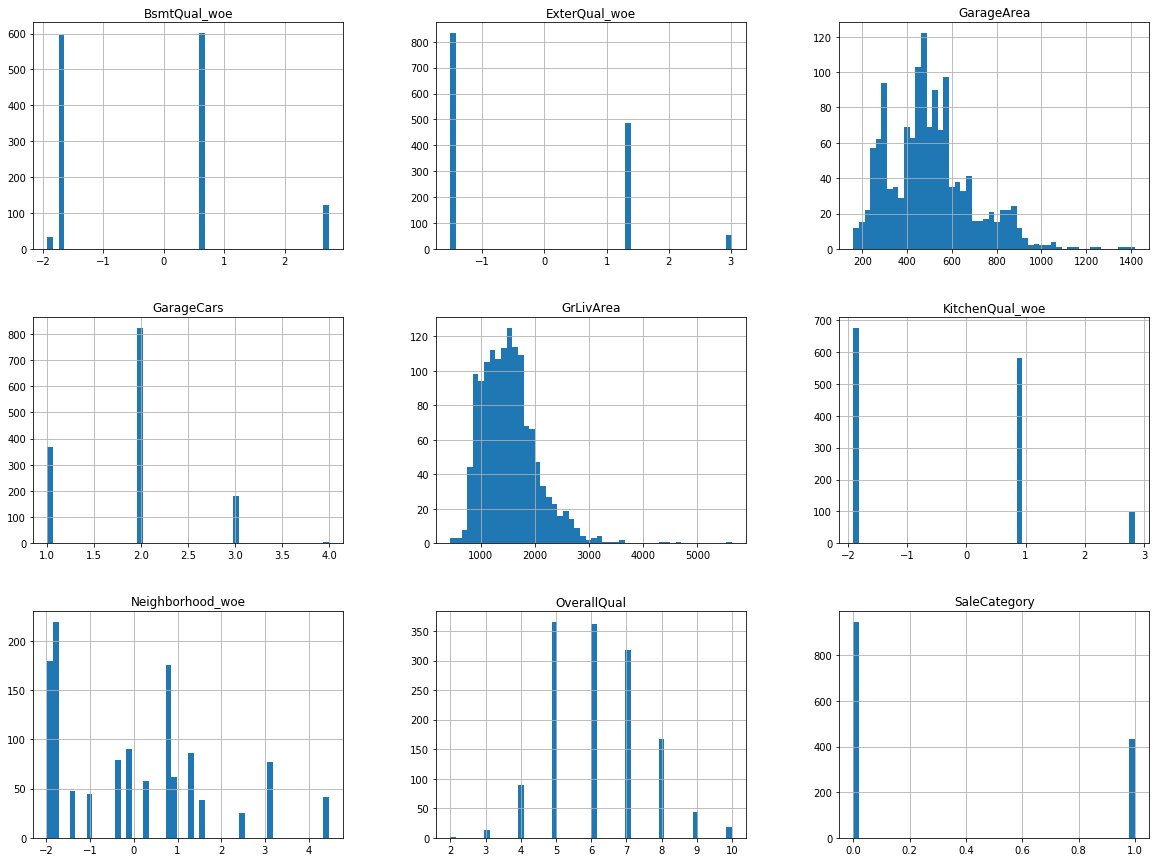

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
db1[good_corr.index].hist(bins=50, figsize=(20,15))

In [28]:
db2=db1.dropna()

In [29]:
db2.shape

(1025, 77)

In [30]:
db_factors=db2.drop('SaleCategory', axis=1)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=db_factors.shape[1]).fit(db_factors)
for i in range(1, db_factors.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.987
n-components=2, explained variance 0.990
n-components=3, explained variance 0.993
n-components=4, explained variance 0.996
n-components=5, explained variance 0.998
n-components=6, explained variance 0.999
n-components=7, explained variance 0.999
n-components=8, explained variance 0.999
n-components=9, explained variance 1.000
n-components=10, explained variance 1.000
n-components=11, explained variance 1.000
n-components=12, explained variance 1.000
n-components=13, explained variance 1.000
n-components=14, explained variance 1.000
n-components=15, explained variance 1.000
n-components=16, explained variance 1.000
n-components=17, explained variance 1.000
n-components=18, explained variance 1.000
n-components=19, explained variance 1.000
n-components=20, explained variance 1.000
n-components=21, explained variance 1.000
n-components=22, explained variance 1.000
n-components=23, explained variance 1.000
n-components=24, explained variance 1.000
n

можно взять 9 компонентов

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
kf = KFold(n_splits=5)
lasso = linear_model.Lasso()
results = cross_val_score(lasso, db_factors, db2['SaleCategory'], cv=kf)

In [33]:
results

array([0.55412722, 0.41387787, 0.55616925, 0.51343208, 0.50697593])

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(db_factors, db2['SaleCategory'])
model.score(db_factors, db2['SaleCategory'])

0.8926829268292683

In [36]:
new_factors = PCA(n_components=9).fit_transform(db_factors)
model2 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new_factors, db2['SaleCategory'])
model2.score(new_factors, db2['SaleCategory'])

0.8868292682926829

In [38]:
y_predict=model.predict(db_factors)
from sklearn.metrics import accuracy_score
print(accuracy_score(db2['SaleCategory'], y_predict))
from sklearn.metrics import recall_score
print(recall_score(db2['SaleCategory'], y_predict, average='macro'))

0.8926829268292683
0.8842009499279284


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model1=clf.fit(db_factors, db2['SaleCategory'])
model1.score(db_factors, db2['SaleCategory'])

In [ ]:
y_predict1=model1.predict(db_factors)
accuracy_score(db2['SaleCategory'], y_predict1)
recall_score(db2['SaleCategory'], y_predict1, average='macro')